In [1]:
import os

import cv2
import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append("/kaggle/src/")

from model.model_module import ModelModule
from conf import ExpConfig

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
config = ExpConfig()
model = ModelModule(config)

In [4]:
# modelの読み込み
model.load_state_dict(torch.load("/kaggle/working/exp001_making3/last.pth"))

<All keys matched successfully>

In [24]:
image = cv2.imread("/kaggle/input/blood-vessel-segmentation/train/kidney_1_dense/images/0500.tif", cv2.IMREAD_GRAYSCALE)

In [6]:
pred, pred_nums = model.overlap_predict(image)

original_img.shape (1303, 912)
h_stride_num 9 w_stride_num 5


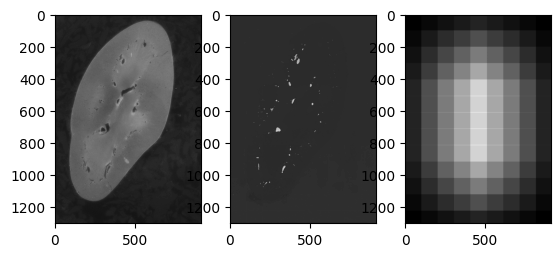

In [9]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(pred, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(pred_nums, cmap="gray")
plt.show()

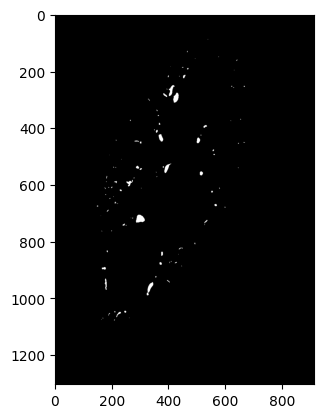

In [15]:
label = cv2.imread("/kaggle/input/blood-vessel-segmentation/train/kidney_1_dense/labels/0500.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(label, cmap="gray")

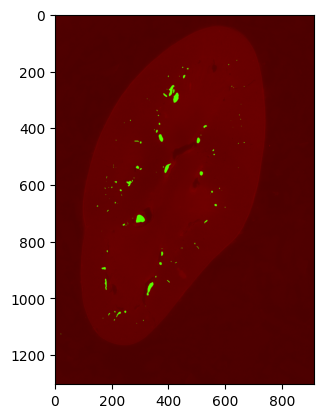

In [18]:

brend_image = image.copy()
brend_image = np.expand_dims(brend_image, axis=-1)
brend_image = np.concatenate([brend_image/255, 
                              np.expand_dims(pred, axis=-1),
                              np.zeros_like(brend_image)], 
                              axis=-1)
plt.imshow(brend_image)

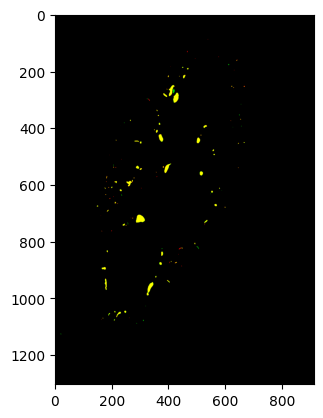

In [20]:
brend_label = label.copy()
brend_label = np.expand_dims(brend_label, axis=-1)
brend_label = np.concatenate([brend_label/255, 
                              np.expand_dims(pred, axis=-1),
                              np.zeros_like(brend_label)], 
                              axis=-1)
plt.imshow(brend_label)

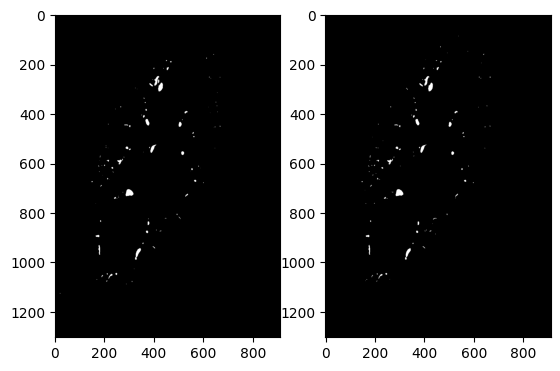

In [23]:
pred_bin = pred.copy()
pred_bin = np.where(pred_bin > 0.5, 1, 0)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(pred_bin, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(label, cmap="gray")
plt.show()